In [101]:
import pandas as pd
import geopandas as gpd
import cartopy
import matplotlib.pyplot as plt
import datetime

In [102]:
data_file = 'astd.csv'
df = pd.read_csv(data_file, delimiter= ';')

In [103]:
print(f'The ASTD subset contains {df.shape[0]} rows and {len(df.columns)} columns.')

The ASTD subset contains 3495203 rows and 26 columns.


In [104]:
print('These columns are:')
for col in df.columns:
    print(col)

These columns are:
shipid
date_time_utc
flagname
iceclass
astd_cat
sizegroup_gt
fuelquality
fuelcons
co
co2
so2
pm
nox
n2o
nmvoc
ch4
blackcarbon
organiccarbon
oilbilgewater
blackwater
greywater
garbage
dist_nextpoint
sec_nextpoint
longitude
latitude


In [105]:
ship_types = df['astd_cat'].unique()
print(f'We recieved data from {len(ship_types)} types of ships.')
print('These types of ships are:')
for ship in ship_types:
    print(ship)

We recieved data from 13 types of ships.
These types of ships are:
Offshore supply ships
Passenger ships
Fishing vessels
Chemical tankers
General cargo ships
Refrigerated cargo ships
Cruise ships
Ro-Ro cargo ships
Oil product tankers
Bulk carriers
Crude oil tankers
Container ships
Gas tankers


In [106]:
df['date_time_utc'] = pd.to_datetime(df['date_time_utc'])

In [107]:
e_rep = df['date_time_utc'].argmin()

e_date = df.loc[e_rep]['date_time_utc']
e_flag = df.loc[e_rep]['flagname']
e_type = df.loc[e_rep]['astd_cat']
print(f'The earliest report was received at {e_date} from {e_flag} for {e_type}.')

l_rep = df['date_time_utc'].argmax()

l_date = df.loc[l_rep]['date_time_utc']
l_flag = df.loc[l_rep]['flagname']
l_type = df.loc[l_rep]['astd_cat']
print(f'The latest report was received at {l_date} from {l_flag} for {l_type}.')

The earliest report was received at 2019-09-01 00:00:00 from Norway for Offshore supply ships.
The latest report was received at 2019-09-30 23:59:58 from Norway (Nis) for General cargo ships.


In [108]:
id_df = df[ df['shipid'] == 2868]
id_e_rep = id_df['date_time_utc'].argmin()
id_df = id_df.reset_index()

id_e_date = id_df.loc[id_e_rep]['date_time_utc']
id_e_flag = id_df.loc[id_e_rep]['flagname']
id_e_type = id_df.loc[id_e_rep]['astd_cat']
print(f'The earliest report for ship 2868 was received at {id_e_date} from {id_e_flag} for {id_e_type}.')

id_l_rep = id_df['date_time_utc'].argmax()


id_l_date = id_df.loc[id_l_rep]['date_time_utc']
id_l_flag = id_df.loc[id_l_rep]['flagname']
id_l_type = id_df.loc[id_l_rep]['astd_cat']
print(f'The latest report for ship 2868 was received at {id_l_date} from {id_l_flag} for {id_l_type}.')

The earliest report for ship 2868 was received at 2019-09-01 00:05:17 from Iceland for Fishing vessels.
The latest report for ship 2868 was received at 2019-09-30 23:59:24 from Iceland for Fishing vessels.


In [109]:
temp_df = df [df['shipid'] == 3920]
temp_df #next step make a geodataframe
g_df = gpd.GeoDataFrame(temp_df, geometry = gpd.points_from_xy(temp_df.longitude, temp_df.latitude), crs= cartopy.crs.PlateCarree())

(0.0, 150.0)

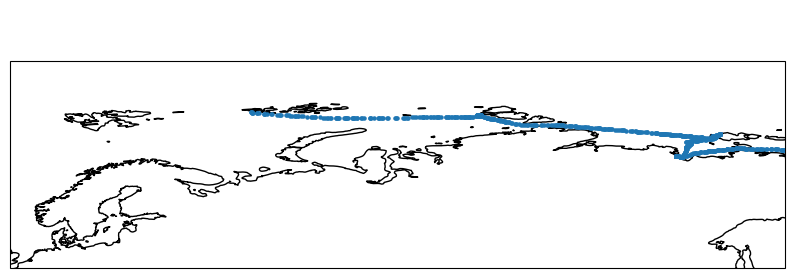

In [110]:
fig, ax = plt.subplots(figsize = (10, 10), subplot_kw={"projection": cartopy.crs.PlateCarree()})
g_df.plot(ax=ax, zorder=999, markersize = 5)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
# ax.add_feature(cartopy.feature.STATES, edgecolor='lightgrey')

ax.set_ylim(50, 100)
ax.set_xlim(0, 150)

In [111]:
g_df.get_coordinates()

,x,y
2404,46.701740,80.155860
3181,46.739040,80.136160
4316,46.807335,80.104160
4686,46.830850,80.095856
5280,46.885520,80.083980
...,...,...
3486309,-179.546900,68.919624
3489206,-179.547270,68.919310
3489532,-179.547120,68.919334
3493754,-179.546970,68.919550


(-2500000.0, 5000000.0)

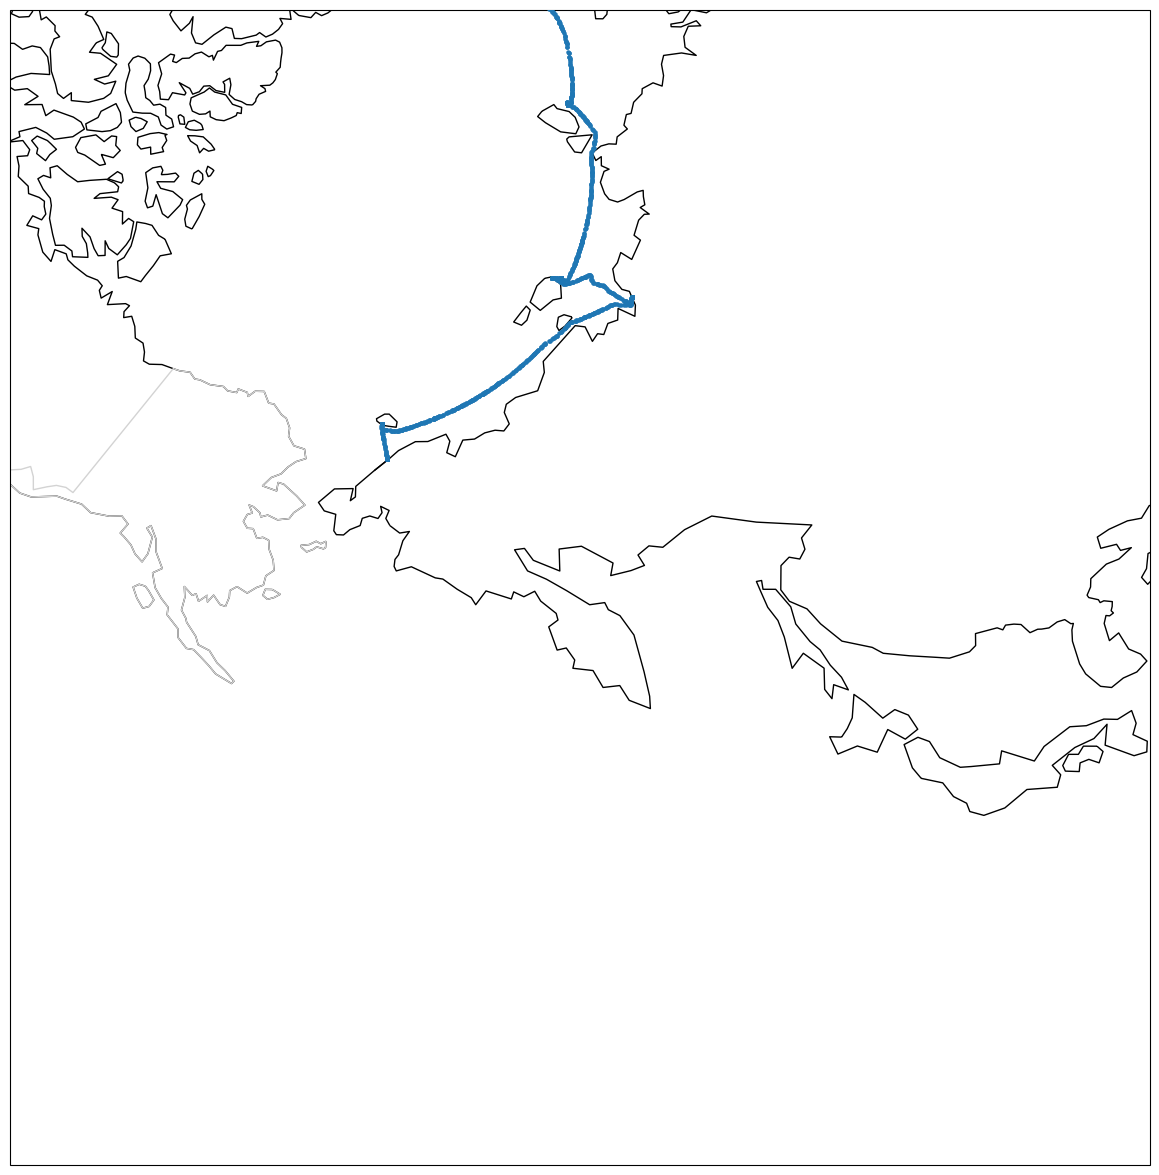

In [112]:
crs_equidist = cartopy.crs.AzimuthalEquidistant(central_longitude= 0, central_latitude=90) 
g_df = g_df.to_crs(crs_equidist)
fig_2, ax_2 = plt.subplots(figsize = (15, 15), subplot_kw={"projection": crs_equidist})
g_df.plot(ax=ax_2, zorder=999, markersize= 5)
ax_2.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax_2.add_feature(cartopy.feature.STATES, edgecolor='lightgrey')
ax_2.set_ylim( 7e+06, -6e+05) 
ax_2.set_xlim(-2500000, 5000000) 

In [113]:
g_df = g_df.reset_index()

In [114]:

a = g_df['date_time_utc'].argmin()
b = g_df['date_time_utc'].argmax()
point_from = g_df.geometry[a]
point_to = g_df.geometry[b]

length = point_from.distance(point_to)

print(f'The linear distance between source and destination is {length} m.')

The linear distance between source and destination is 3213485.3684609593 m.


In [115]:
dist = 0
for i in range(len(g_df.geometry) - 1):
    length_2 = g_df.geometry[i].distance(g_df.geometry[i + 1])
    dist = length_2 + dist

print(f'The travel distance for ship ID 3920 is {dist} m.')

The travel distance for ship ID 3920 is 5342556.993398042 m.


In [116]:
c = g_df['date_time_utc'].argmin()
d = g_df['date_time_utc'].argmax()

start_date = g_df.date_time_utc[c]
end_date = g_df.date_time_utc[d]

dif = end_date - start_date

tot_sec = dif.total_seconds()

m = tot_sec / 60
h = m / 60
spd = dist / h

print(f'The average travel speed is {spd} km/h') # This is way too fast for any ship, whats wrong with the math??

The average travel speed is 7426.174457148674 km/h
